In [1]:
pip install pmdarima  

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


# Importing the required libraries

In [1]:
#Analysing the data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr

# Processing on Data
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error

#avoiding the unecessary warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas_datareader'

### Importing the dataset and converting to csv file

In [23]:
key="c0940a517ea44243f1f1b3e40a872cc0984d8f3b"
daf = pdr.get_data_tiingo('NSRGY', api_key=key)
daf.to_csv('NSRGY.csv') 
daf=pd.read_csv('NSRGY.csv')
daf

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NSRGY,2017-05-10 00:00:00+00:00,80.05,80.29,79.9100,80.24,2551870,68.035044,68.239021,67.916057,68.196526,2551870,0.0,1.0
1,NSRGY,2017-05-11 00:00:00+00:00,80.09,80.53,79.9800,80.25,418120,68.069040,68.442999,67.975550,68.205025,418120,0.0,1.0
2,NSRGY,2017-05-12 00:00:00+00:00,81.11,81.24,80.6400,80.68,517056,68.935945,69.046433,68.536489,68.570485,517056,0.0,1.0
3,NSRGY,2017-05-15 00:00:00+00:00,81.61,81.89,81.3900,81.80,382386,69.360898,69.598872,69.173919,69.522381,382386,0.0,1.0
4,NSRGY,2017-05-16 00:00:00+00:00,83.27,83.44,82.9100,82.98,932885,70.771744,70.916228,70.465777,70.525271,932885,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,NSRGY,2022-05-02 00:00:00+00:00,128.20,129.03,127.6201,128.90,254135,128.200000,129.030000,127.620100,128.900000,254135,0.0,1.0
1254,NSRGY,2022-05-03 00:00:00+00:00,127.55,128.67,127.2900,128.56,272730,127.550000,128.670000,127.290000,128.560000,272730,0.0,1.0
1255,NSRGY,2022-05-04 00:00:00+00:00,128.00,128.33,125.5700,126.55,253236,128.000000,128.330000,125.570000,126.550000,253236,0.0,1.0
1256,NSRGY,2022-05-05 00:00:00+00:00,126.46,127.26,125.7500,127.01,226804,126.460000,127.260000,125.750000,127.010000,226804,0.0,1.0


### Keeping only the date and close column from the dataset

In [24]:
daf1=daf.sort_index()
daf_stock=daf1[['date','close']].copy()

### Training and Testing the data

In [25]:
tn = daf_stock[:800]
vd = daf_stock[800:]


print('\n Rows and Columns of train data:')
print(tn.shape)


print('\n Rows and Columns of valiation data:')
print(vd.shape)


 Rows and Columns of train data:
(800, 2)

 Rows and Columns of valiation data:
(458, 2)


### Predicting the stock

In [26]:
pted = []
l=vd.shape[0]
for z in range(0,l):
    m = (tn['close'][len(tn)-458+z:].sum() + sum(pted))/ l
    # note: 458 taken from shape of validation set
    pted.append(m)
pted

[99.66951965065502,
 99.70539196430275,
 99.742412470775,
 99.77597669014352,
 99.81046572221805,
 99.84789031986483,
 99.88509095375099,
 99.9204514143487,
 99.9573301292272,
 99.99391818627792,
 100.02984377183748,
 100.06600063596812,
 100.10197443648333,
 100.14042852913941,
 100.1812591591157,
 100.22169858959413,
 100.2625538266893,
 100.3045244682323,
 100.35066971816292,
 100.39630436820259,
 100.44131813319866,
 100.4838974304327,
 100.52949545975682,
 100.57538955464713,
 100.61406944450442,
 100.65145824241819,
 100.68814264906102,
 100.72623903039086,
 100.7628902073131,
 100.79983974925045,
 100.83894420285142,
 100.87536111159129,
 100.9115955244987,
 100.94677368066573,
 100.98432122145321,
 101.02151406254809,
 101.05828592731346,
 101.09406821099755,
 101.13058364377268,
 101.16608710151017,
 101.20330563229948,
 101.24027791533943,
 101.27925232126813,
 101.31774413856347,
 101.35496628733762,
 101.39388542770298,
 101.43236552689012,
 101.46957593197067,
 101.5064090

### Arranging the date in proper format

In [27]:
daf_stock['date'] = pd.to_datetime(daf_stock.date,format='%Y-%m-%d')
daf_stock.head()

,date,close
0,2017-05-10 00:00:00+00:00,80.05
1,2017-05-11 00:00:00+00:00,80.09
2,2017-05-12 00:00:00+00:00,81.11
3,2017-05-15 00:00:00+00:00,81.61
4,2017-05-16 00:00:00+00:00,83.27


### Seperating the data in train and test format for Linear Regression

In [28]:
tn1 = daf_stock[:800]
vd1 = daf_stock[800:]

x_tn1 = tn1.drop('close', axis=1)
y_tn1 = tn1['close']

x_tn1['date'] = pd.to_datetime(x_tn1['date'])
x_tn1['date']=x_tn1['date'].map(dt.datetime.toordinal)

x_vd1 = vd1.drop('close', axis=1)

x_vd1['date'] = pd.to_datetime(x_vd1['date'])
x_vd1['date']=x_vd1['date'].map(dt.datetime.toordinal)

y_vd1 = vd1['close']

### Training the Linear Regression Model

In [29]:
m = LinearRegression()
m.fit(x_tn1,y_tn1)

LinearRegression()

In [30]:
prd1 = m.predict(x_vd1)

In [31]:
sc = MinMaxScaler(feature_range=(0, 1))

In [32]:
x_tn_sc = sc.fit_transform(x_tn1)
x_tn_knn = pd.DataFrame(x_tn_sc)
x_vd_sc = sc.fit_transform(x_vd1)
x_vd_knn = pd.DataFrame(x_vd_sc)

### Training the KNN Model

In [33]:
parameters = {'n_neighbors':[3,5,7,9,11,13,15]}
mo_knn = neighbors.KNeighborsRegressor()
mo = GridSearchCV(mo_knn, parameters, cv=3)

In [34]:
mo.fit(x_tn_knn,y_tn1)
predicted_knn = mo.predict(x_vd_knn)

### Training the Auto Arima

In [35]:
tn2 = daf_stock[:800]
vd2 = daf_stock[800:]

tn_ar = tn2['close']
vd_ar = vd2['close']

ml = auto_arima(tn_ar, s_p=1, s_q=1, m_p=3, m_q=3, m=12,s_P=0, seasnl=True,d=1, D=1, trc=True,err_actn='ignore',suprs_warn=True)
ml.fit(tn_ar)

prdctd_ar = ml.predict(n_periods=l)
prdctd_ar = pd.DataFrame(prdctd_ar,index = vd2.index,columns=['Prediction'])

### Training the LSTM

In [36]:
daf_stock=daf1[['date','close']].copy()
daf_stock.index = daf_stock.date
daf_stock.drop('date', axis=1, inplace=True)

dt_lm = daf_stock.values

tn_lm = dt_lm[0:800,:]
vd_lm = dt_lm[800:,:]


sr = MinMaxScaler(feature_range=(0, 1))
sd_dt = sr.fit_transform(dt_lm)

x_tn3, y_tn3 = [], []
for k in range(60,len(tn_lm)):
    x_tn3.append(sd_dt[k-60:k,0])
    y_tn3.append(sd_dt[k,0])
x_tn3, y_tn3 = np.array(x_tn3), np.array(y_tn3)

x_tn3 = np.reshape(x_tn3, (x_tn3.shape[0],x_tn3.shape[1],1))

me = Sequential()
me.add(LSTM(units=50, return_sequences=True, input_shape=(x_tn3.shape[1],1)))
me.add(LSTM(units=50))
me.add(Dense(1))

me.compile(loss='mean_squared_error', optimizer='adam')
me.fit(x_tn3, y_tn3, epochs=1, batch_size=1, verbose=2)


ips = daf_stock[len(daf_stock) - len(vd_lm) - 60:].values
ips = ips.reshape(-1,1)
ips  = sr.transform(ips)

X_tt3 = []
for d in range(60,ips.shape[0]):
    X_tt3.append(ips[d-60:d,0])
X_tt3 = np.array(X_tt3)

X_tt3 = np.reshape(X_tt3, (X_tt3.shape[0],X_tt3.shape[1],1))
cp = me.predict(X_tt3)
cp = sr.inverse_transform(cp)

740/740 - 20s - loss: 0.0027 - 20s/epoch - 27ms/step


### Finding the Error value with existing train and test

In [37]:
rmse1=np.sqrt(mean_squared_error(vd['close'],pted))
print('\n Predicted value for validation sets rmse:\n',rmse1)

mse1 = mean_squared_error(vd['close'],pted)
print('\n Predicted value for validation sets mse:\n',mse1)


mae1=mean_absolute_error(vd['close'],pted)
print('\n Predicted value for validation sets mse:\n',mae1)


 Predicted value for validation sets rmse:
 19.649437470768714

 Predicted value for validation sets mse:
 386.10039291764963

 Predicted value for validation sets mse:
 18.222681057668343


### Finding the Error Values for KNN model

In [38]:
rmse2=np.sqrt(mean_squared_error(y_vd1,predicted_knn))
print('\n Predicted value for KNN validation sets rmse:\n',rmse2)

mse2 = mean_squared_error(y_vd1,predicted_knn)
print('\n Predicted value for validation sets mse:\n',mse2)


mae2=mean_absolute_error(y_vd1,predicted_knn)
print('\n Predicted value for validation sets mse:\n',mae2)



 Predicted value for KNN validation sets rmse:
 30.824781210319895

 Predicted value for validation sets mse:
 950.1671366640903

 Predicted value for validation sets mse:
 29.96521120815138


### Finding the Error Values for Linear Regression Model


In [39]:
rmse3=np.sqrt(mean_squared_error(y_vd1,prd1))
print('\n Predicted value for Linear Regression validation sets rmse:\n',rmse3)

mse3 = mean_squared_error(y_vd1,prd1)
print('\n Predicted value for validation sets mse:\n',mse3)

mae3=mean_absolute_error(y_vd1,prd1)
print('\n Predicted value for validation sets mse:\n',mae3)



 Predicted value for Linear Regression validation sets rmse:
 6.258542221331455

 Predicted value for validation sets mse:
 39.169350736188456

 Predicted value for validation sets mse:
 5.152480634555938


### Finding the Error Values for Auto Arima Model

In [40]:
rmse4=np.sqrt(mean_squared_error(vd_ar,prdctd_ar))
print('\n Predicted value for Arima validation sets rmse:\n',rmse4)

mse4 = mean_squared_error(vd_ar,prdctd_ar)
print('\n Predicted value for validation sets mse:\n',mse4)

mae4=mean_absolute_error(vd_ar,prdctd_ar)
print('\n Predicted value for validation sets mse:\n',mae4)



 Predicted value for Arima validation sets rmse:
 35.775719911002675

 Predicted value for validation sets mse:
 1279.902135150513

 Predicted value for validation sets mse:
 31.234280317381486


### Finding the Error Values for LSTM Model

In [41]:
rmse5=np.sqrt(mean_squared_error(vd_lm,cp))
print('\n Predicted value for LSTM validation sets rmse:\n',rmse5)

mse5 = mean_squared_error(vd_lm,cp)
print('\n Predicted value for validation sets mse:\n',mse5)

mae5=mean_absolute_error(vd_lm,cp)
print('\n Predicted value for validation sets mse:\n',mae5)



 Predicted value for LSTM validation sets rmse:
 2.408052056286815

 Predicted value for validation sets mse:
 5.798714705787157

 Predicted value for validation sets mse:
 1.8847700691589622


### Ploting the graph of 'Close' Values of train model

Text(0.5, 1.0, 'Plot of Closed price of Trained Data')

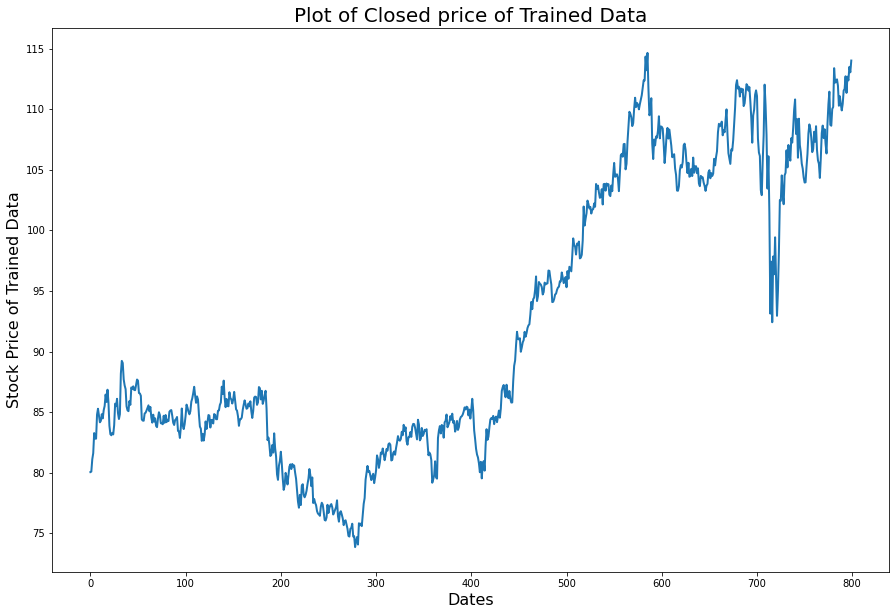

In [42]:
plt.figure(figsize=(15,10))
plt.plot(tn['close'],'-',lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Plot of Closed price of Trained Data',fontsize=20)

### Ploting the graph of Predicted Value

Text(0.5, 1.0, 'Predicted Price of Trained Data')

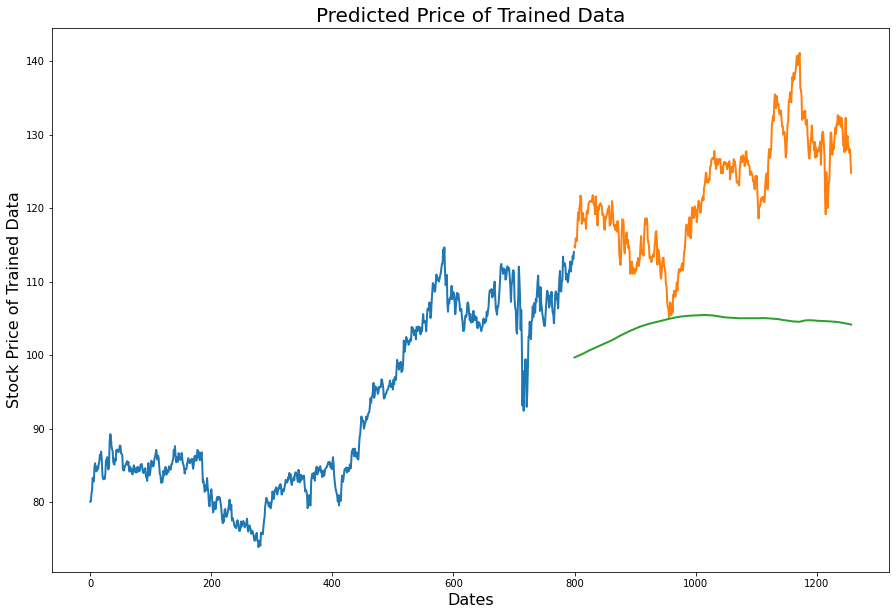

In [43]:
vd['Predictions'] = pted
plt.figure(figsize=(15,10))
plt.plot(tn['close'],lw=2)
plt.plot(vd[['close', 'Predictions']],lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Predicted Price of Trained Data',fontsize=20)

### Ploting the graph of Linear Regression Model

Text(0.5, 1.0, 'Plot of Predicted price using Linear Regression')

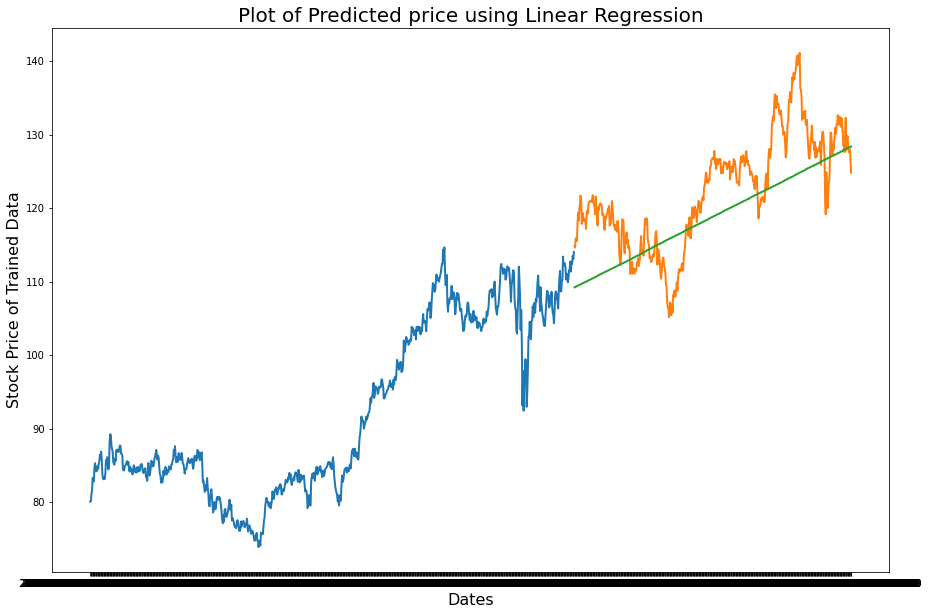

In [44]:
vd1['Predictions'] = prd1

vd1.index = daf_stock[800:].index
tn1.index = daf_stock[:800].index

plt.figure(figsize=(15,10))
plt.plot(tn1['close'],lw=2)
plt.plot(vd1[['close', 'Predictions']],lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Plot of Predicted price using Linear Regression',fontsize=20)

### Ploting the graph of Predicted Stock Prices using KNN Model

Text(0.5, 1.0, 'Plot of Predicted price using KNN')

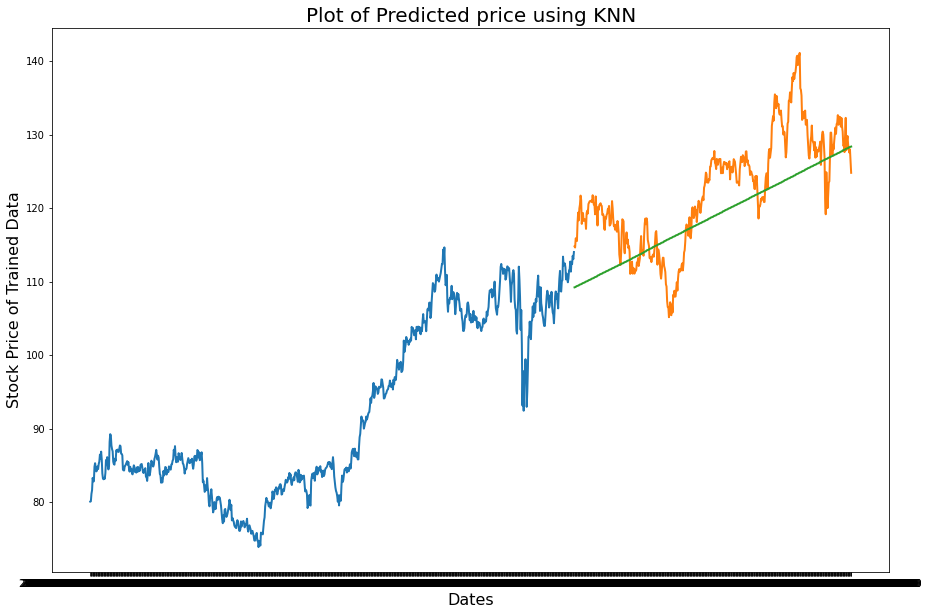

In [45]:
predicted_knn = vd['Predictions']
plt.figure(figsize=(15,10))
plt.plot(tn1['close'],lw=2)
plt.plot(vd1[['close', 'Predictions']],lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Plot of Predicted price using KNN',fontsize=20)

### Ploting the graph of Predicted Stock Prices using Auto Arima Model

Text(0.5, 1.0, 'Plot of Predicted price using Auto Arima')

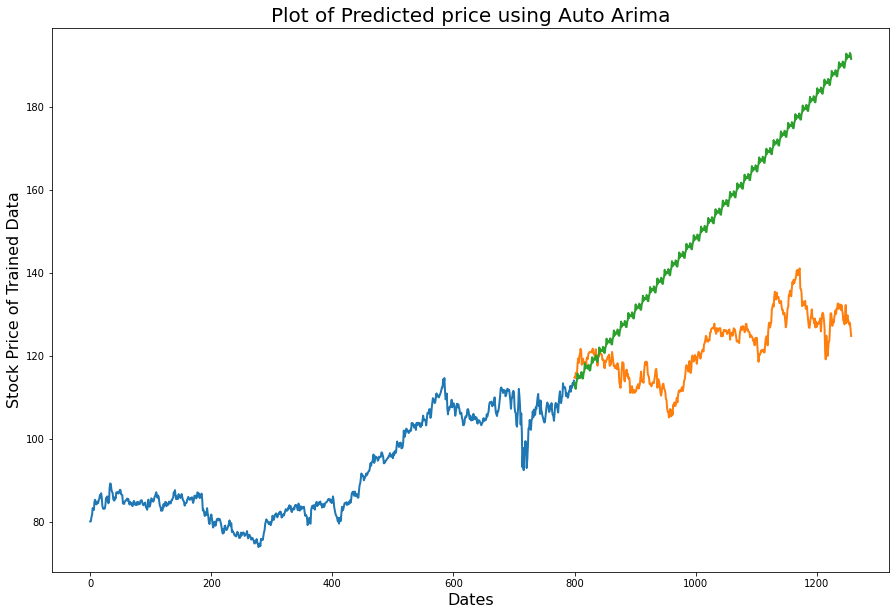

In [46]:
vd2['Predictions_ar'] = prdctd_ar
plt.figure(figsize=(15,10))
plt.plot(tn2['close'],lw=2)
plt.plot(vd2[['close','Predictions_ar']],lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Plot of Predicted price using Auto Arima',fontsize=20)

### Ploting the graph of Predicted Stock Prices using LSTM Model

Text(0.5, 1.0, 'Plot of Predicted price using LSTM Model')

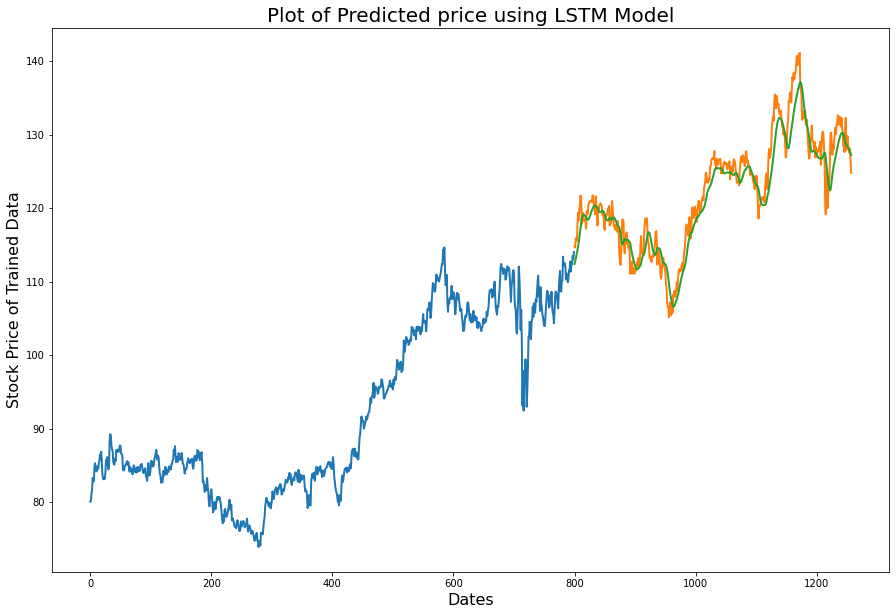

In [47]:
vd['Predictions_lstm'] = cp
plt.figure(figsize=(15,10))
plt.plot(tn['close'],lw=2)
plt.plot(vd[['close','Predictions_lstm']],lw=2)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price of Trained Data', fontsize=16)
plt.title('Plot of Predicted price using LSTM Model',fontsize=20)

# Plotting the graph of errors using grouped bar graph

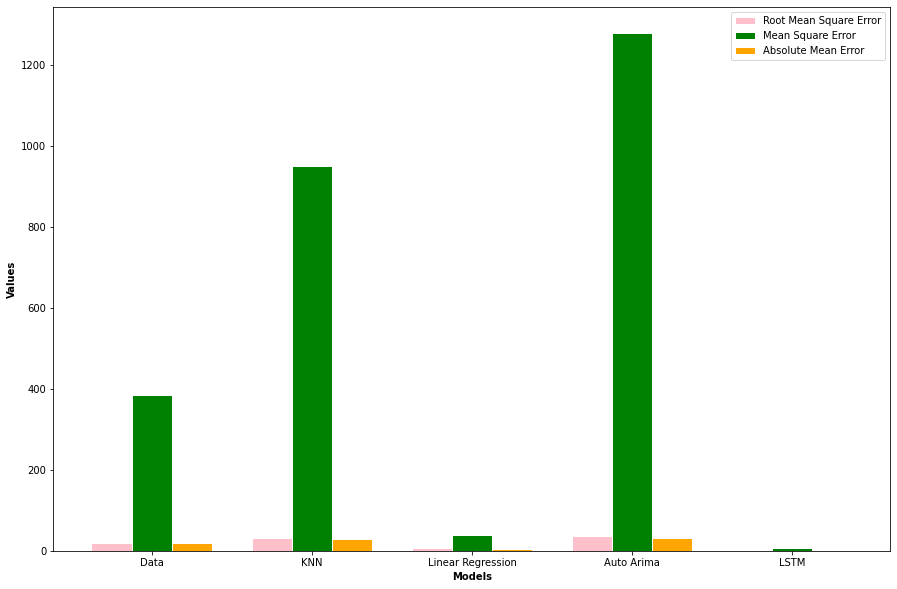

In [48]:
plt.figure(figsize=(15,10))
# set bar width 
barWidth = 0.25
 
# set bar heights 
bars1 = [rmse1, rmse2, rmse3, rmse4, rmse5]
bars2 = [mse1, mse2, mse3, mse4, mse5]
bars3 =[mae1, mae2, mae3, mae4, mae5]

 
# Set bar position on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Root Mean Square Error')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Mean Square Error')
plt.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='Absolute Mean Error')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Data', 'KNN', 'Linear Regression', 'Auto Arima', 'LSTM'])
 
# Create legend & Show graphic
plt.legend()
plt.show()